In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import scipy
from scipy.stats.stats import pearsonr
from scipy import stats

%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

hrt = pd.read_csv('songs1.csv')
hrt

,Artist,Song,Популярность в США,Популярность в СНГ
0,Nirvana,Smells like Teen Spirit,47.29,7.45
1,AC/DC,Highway to Hell,28.08,0.82
2,Led Zeppelin,Smoke on the Water,16.21,3.31
3,Deep Purple,Brick in the Wall,15.55,2.96
4,Michael Jackson,You are not Alone,11.27,1.19
...,...,...,...,...
10889,Apocalyptica,You are not Alone,0.00,0.00
10890,Bolu2 Death,Broken Landscape,0.05,0.01
10891,The Killers,Caution,0.00,0.01
10892,Halfives,Rockstar Everyday,0.05,0.01


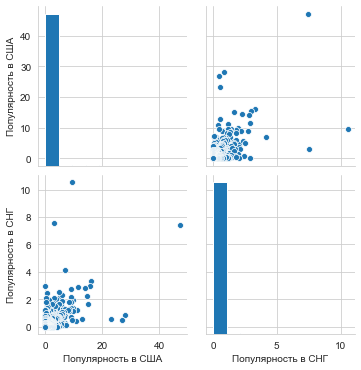

In [2]:
x = hrt[['Популярность в США' ,'Популярность в СНГ']]
x.corr()
sb.pairplot(x)

R-squared for degree 1 =  0.3817218441721567
R-squared for degree 2 =  0.3860258344574271
R-squared for degree 3 =  0.40836566725000123
R-squared for degree 4 =  0.4409722792463532
R-squared for degree 5 =  0.44118421900555393


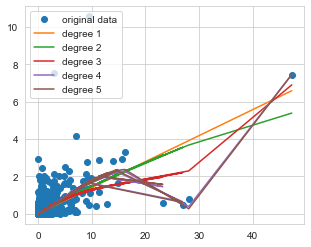

In [3]:
import sklearn.linear_model as lm
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

x = hrt['Популярность в США']
y = hrt['Популярность в СНГ']
plt.plot(x, y, 'o', label='original data')
lr = lm.LinearRegression()
for deg in [1, 2, 3, 4, 5]:
    lr.fit(np.vander(x, deg + 1), y)
    y_lr = lr.predict(np.vander(x, deg + 1))
    plt.plot(x, y_lr, label='degree ' + str(deg))
    plt.legend(loc=2)
    print ("R-squared for degree " + str(deg) + " = ", r2_score(y, y_lr))

plt.show()

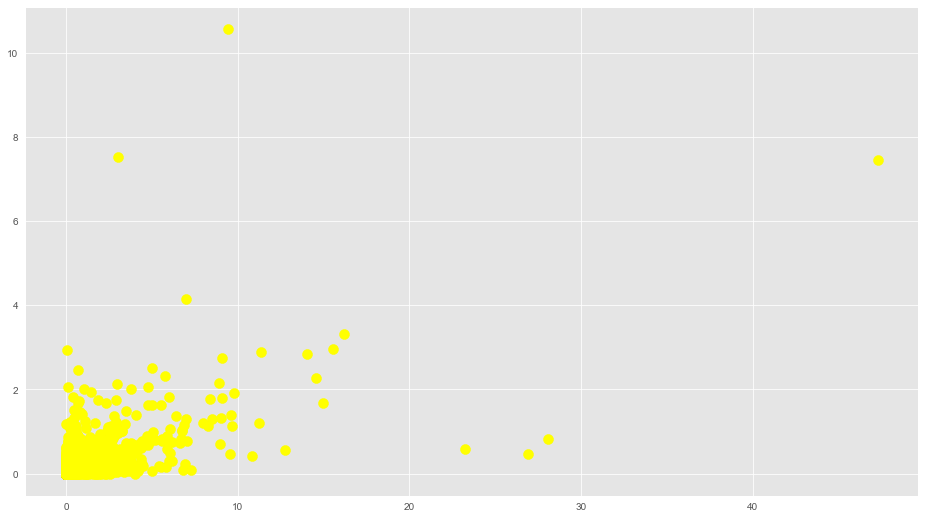

In [7]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

glo = hrt['Популярность в США'].values
na = hrt['Популярность в СНГ'].values
X = np.array(list(zip(glo, na)))
plt.scatter(glo, na, c='yellow', s=100)

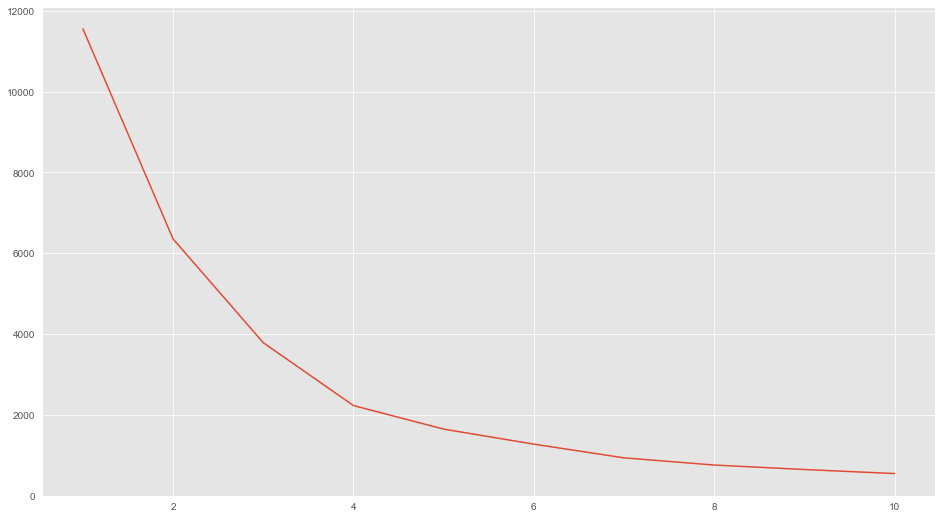

In [8]:
X=hrt.iloc[:,[2,3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.show()

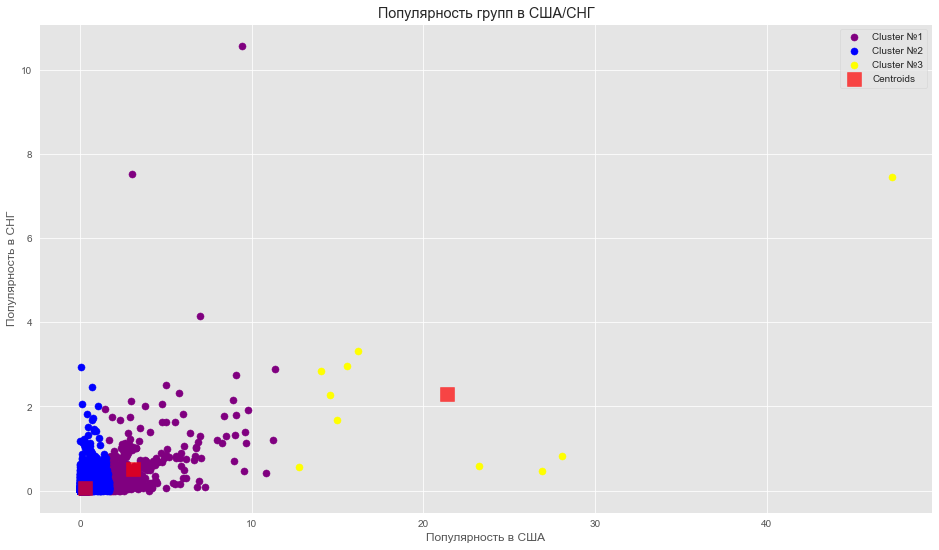

In [9]:
km4=KMeans(n_clusters=3,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster №1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster №2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='yellow',label='Cluster №3')

plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Популярность групп в США/СНГ')
plt.xlabel('Популярность в США')
plt.ylabel('Популярность в СНГ')
plt.legend()
plt.show()